In [1]:
!pip install kmodes

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

from sklearn.metrics import silhouette_score

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [5]:
# Importar y leer el csv

df = pd.read_csv("/content/bankmarketing.csv")

In [6]:
# Eliminamos variables númericas no interesantes

df = df.drop(['y', 'cons.price.idx', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent


##DATASET:

*   age (numeric)
*   job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
*   marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
*   education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
*   default: has credit in default? (categorical: 'no','yes','unknown')
*   housing: has housing loan? (categorical: 'no','yes','unknown')
*   loan: has personal loan? (categorical: 'no','yes','unknown')
contact: contact communication type (categorical: 'cellular','telephone')
*   month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
*   day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
*   poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')



In [8]:

# Observar los tipos de variables en el dataset
print(df.dtypes)


age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object


In [10]:
# Obtener únicamente las variables categóricas
df_cat = df.select_dtypes(include=['object'])

In [11]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [12]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [13]:
# Verificar si hay valores nulos en el dataset
if df.isnull().any().any():
    print("Hay valores nulos en el dataset.")
else:
    print("No hay valores nulos en el dataset, por lo tanto está limpio.")


No hay valores nulos en el dataset, por lo tanto está limpio.


### ¿Qué hay que hacer ahora con los objetos?

## LABEL-ENCODING

In [14]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Iterar sobre cada columna del DataFrame de variables categóricas
for col in df_cat.columns:
    # Convertir los valores de la columna a valores enteros
    df_cat[col] = label_encoder.fit_transform(df_cat[col])

# Mostrar las primeras filas del DataFrame con las variables categóricas convertidas
print(df_cat.head())


   job  marital  education  default  housing  loan  contact  month  \
0    3        1          0        0        0     0        1      6   
1    7        1          3        1        0     0        1      6   
2    7        1          3        0        2     0        1      6   
3    0        1          1        0        0     0        1      6   
4    7        1          3        0        0     2        1      6   

   day_of_week  poutcome  
0            1         1  
1            1         1  
2            1         1  
3            1         1  
4            1         1  


## K-MODES Y ELBOW

In [15]:
from kmodes.kmodes import KModes

In [16]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

# Rango de valores k a probar
k_values = range(2, 7)
cost = []
sil = []

# Iteramos sobre cada valor de k
for k in k_values:
    # Instanciamos el algoritmo k-modes
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0, random_state=42)

    # Ajustamos el modelo con los datos
    clusters = km.fit_predict(df_cat)
    cost.append(km.cost_) # Almacenamos la pérdida utilizando el atributo cost_

    # Calculamos el silhouette score para los clusters
    silhouette_avg = silhouette_score(df_cat, clusters, metric='hamming') # Utilizamos la métrica hamming
    sil.append(silhouette_avg)
    print("Para k =", k, "el silhouette score es", silhouette_avg)


Para k = 2 el silhouette score es 0.11871532393245576
Para k = 3 el silhouette score es 0.08940635718160227
Para k = 4 el silhouette score es 0.07449207519895679
Para k = 5 el silhouette score es 0.07219751103965051
Para k = 6 el silhouette score es 0.066235670059048


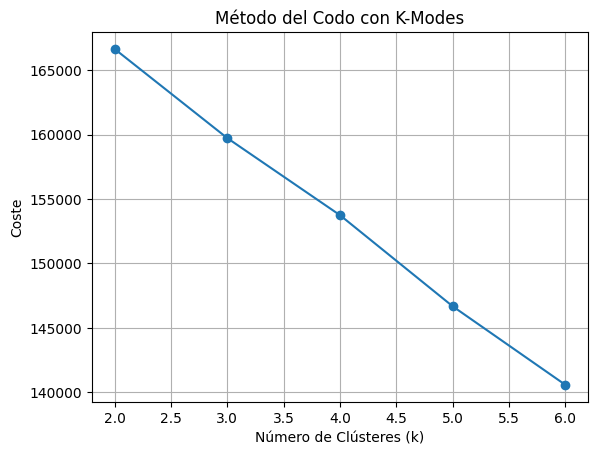

In [17]:
import matplotlib.pyplot as plt

# Plotear el coste en función del número de clusters
plt.plot(k_values, cost, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Coste')
plt.title('Método del Codo con K-Modes')
plt.grid(True)
plt.show()


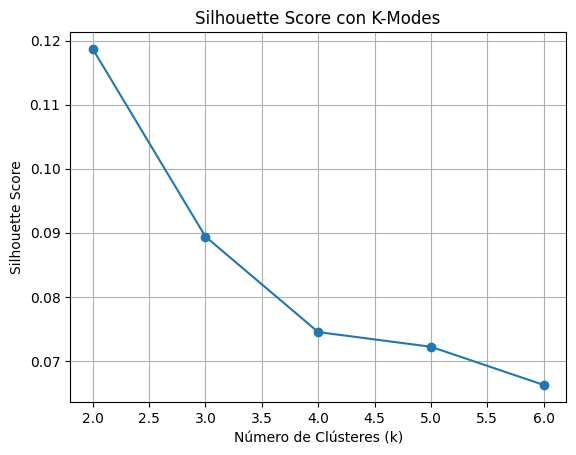

In [18]:
import matplotlib.pyplot as plt

# Plotear el silhouette score en función del número de clusters
plt.plot(k_values, sil, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score con K-Modes')
plt.grid(True)
plt.show()


## MODELO

In [19]:
# Entrenar el modelo K-Modes con el número de clusters conveniente
n_clusters_conveniente = 3  # Reemplaza con el número de clusters que consideres conveniente
km_cao = KModes(n_clusters=n_clusters_conveniente, init='Cao', n_init=5, verbose=0, random_state=42)
model = km_cao.fit_predict(df_cat)


In [20]:
import pandas as pd

# Obtener los centroides de los clusters
cluster_centroids = km_cao.cluster_centroids_

# Crear un DataFrame con los centroides de los clusters
clusterCentroidsDf = pd.DataFrame(cluster_centroids, columns=df_cat.columns)

# Mostrar el DataFrame con los centroides de los clusters
print(clusterCentroidsDf)


   job  marital  education  default  housing  loan  contact  month  \
0    0        1          6        0        2     0        0      6   
1    1        2          3        0        0     0        1      6   
2    9        1          5        1        0     0        0      1   

   day_of_week  poutcome  
0            2         1  
1            4         1  
2            1         1  


In [21]:
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0,1,6,0,2,0,0,6,2,1
1,1,2,3,0,0,0,1,6,4,1
2,9,1,5,1,0,0,0,1,1,1


## UNIR AMBOS DATASETS

In [22]:
# Añadir la columna de clusters al DataFrame original combinado
df_combined = pd.concat([df, pd.Series(model, name='cluster')], axis=1)

# Mostrar las primeras filas del DataFrame combinado
print(df_combined.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  cluster  
0   may         mon       261         1    999         0  nonexistent        1  
1   may         mon       149         1    999         0  nonexistent        1  
2   may         mon       226         1    999         0  nonexistent        0  
3   may         mon       151         1    999         0  nonexistent        0  
4   may         mon       307         1    999         0  nonexistent        1  


In [23]:
# Obtener los valores de cada cluster
cluster_0 = df_combined[df_combined['cluster'] == 0]
cluster_1 = df_combined[df_combined['cluster'] == 1]

# Mostrar las primeras filas de cada cluster
print("Cluster 0:")
print(cluster_0.head())

print("\nCluster 1:")
print(cluster_1.head())


Cluster 0:
    age          job   marital            education default housing loan  \
2    37     services   married          high.school      no     yes   no   
3    40       admin.   married             basic.6y      no      no   no   
6    59       admin.   married  professional.course      no      no   no   
13   57    housemaid  divorced             basic.4y      no     yes   no   
14   35  blue-collar   married             basic.6y      no     yes   no   

      contact month day_of_week  duration  campaign  pdays  previous  \
2   telephone   may         mon       226         1    999         0   
3   telephone   may         mon       151         1    999         0   
6   telephone   may         mon       139         1    999         0   
13  telephone   may         mon       293         1    999         0   
14  telephone   may         mon       146         1    999         0   

       poutcome  cluster  
2   nonexistent        0  
3   nonexistent        0  
6   nonexistent   

In [24]:
cluster_0.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cluster
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,0
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,293,1,999,0,nonexistent,0
14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,146,1,999,0,nonexistent,0


In [25]:
cluster_1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cluster
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1


In [26]:
cluster_0.describe()

,age,duration,campaign,pdays,previous,cluster
count,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.0
mean,40.257108,259.271839,2.493528,953.136356,0.213826,0.0
std,10.603780,257.097260,2.671397,208.442356,0.543233,0.0
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.0
25%,32.000000,104.000000,1.000000,999.000000,0.000000,0.0
50%,38.000000,181.000000,2.000000,999.000000,0.000000,0.0
75%,47.000000,322.000000,3.000000,999.000000,0.000000,0.0
max,98.000000,3631.000000,56.000000,999.000000,7.000000,0.0


* Job: Entrepreneur-blue-collar
* Marital: Mostly divorced
* Education: High-school
* Default: No credit
* Housing: Yes housing loan
* Loan: No personal loan




In [27]:
cluster_1.describe()

,age,duration,campaign,pdays,previous,cluster
count,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.0
mean,37.589212,262.623951,2.688604,979.939689,0.099103,1.0
std,9.477837,268.980642,2.997331,136.226102,0.381388,0.0
min,17.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,30.000000,103.000000,1.000000,999.000000,0.000000,1.0
50%,36.000000,185.000000,2.000000,999.000000,0.000000,1.0
75%,44.000000,325.000000,3.000000,999.000000,0.000000,1.0
max,92.000000,4918.000000,43.000000,999.000000,5.000000,1.0


* Job: Mostly Admin/blue-collar
* Marital: Mostly divorced
* Education: Basic
* Default: Mostly no credit
* Housing: No housing loan
* Loan: No personal loan

## Mejoremos el modelo


Nos quedamos con las variables que vemos que ofrecen diferencias para luego comparar con la edad.

In [28]:
# Seleccionar las variables 'job', 'education' y 'loan'
df2 = df[['job', 'education', 'loan']]

# Mostrar las primeras filas del nuevo DataFrame
print(df2.head())


         job    education loan
0  housemaid     basic.4y   no
1   services  high.school   no
2   services  high.school   no
3     admin.     basic.6y   no
4   services  high.school  yes


In [29]:
df2.head()

,job,education,loan
0,housemaid,basic.4y,no
1,services,high.school,no
2,services,high.school,no
3,admin.,basic.6y,no
4,services,high.school,yes


In [30]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Iterar sobre cada columna categórica y convertir los valores a numéricos
for col in df2.columns:
    df2[col] = label_encoder.fit_transform(df2[col])

# Mostrar las primeras filas del DataFrame con las variables categóricas convertidas
print(df2.head())


   job  education  loan
0    3          0     0
1    7          3     0
2    7          3     0
3    0          1     0
4    7          3     2


In [31]:
from kmodes.kmodes import KModes

In [32]:
# Rango de valores k a probar
k_values2 = range(2, 10)
cost2 = []
sil2 = []

# Iteramos sobre cada valor de k
for k in k_values2:
    # Instanciamos el algoritmo k-modes
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0, random_state=42)

    # Ajustamos el modelo con los datos
    clusters = km.fit_predict(df2)
    cost2.append(km.cost_)  # Almacenamos la pérdida utilizando el atributo cost_

    # Calculamos el silhouette score para los clusters
    silhouette_avg = silhouette_score(df2, clusters, metric='hamming')  # Utilizamos la métrica hamming
    sil2.append(silhouette_avg)
    print("Para k =", k, "el silhouette score es", silhouette_avg)


Para k = 2 el silhouette score es 0.18618600056106763
Para k = 3 el silhouette score es 0.28231690655205416
Para k = 4 el silhouette score es 0.3829564970489782
Para k = 5 el silhouette score es 0.36233272426723717
Para k = 6 el silhouette score es 0.3620292416771157
Para k = 7 el silhouette score es 0.3444191230337625
Para k = 8 el silhouette score es 0.35200637075849095
Para k = 9 el silhouette score es 0.3475308541863208


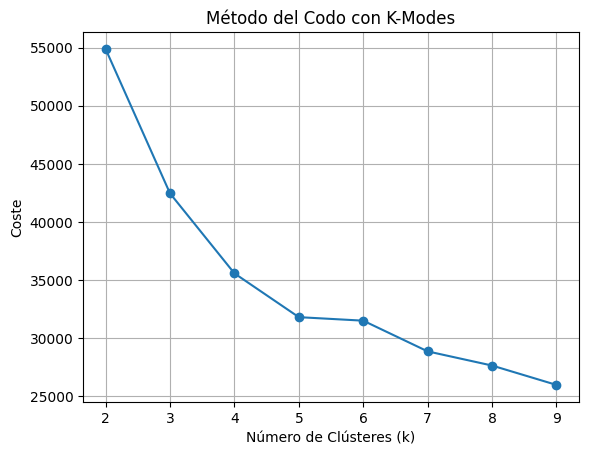

In [33]:
import matplotlib.pyplot as plt

# Plotear el coste en función del número de clusters
plt.plot(k_values2, cost2, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Coste')
plt.title('Método del Codo con K-Modes')
plt.grid(True)
plt.show()


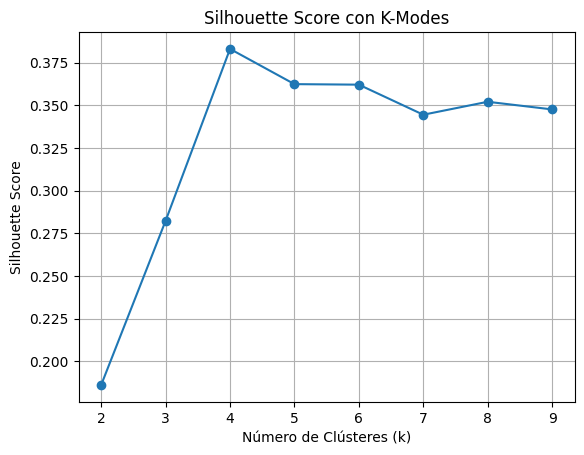

In [34]:
import matplotlib.pyplot as plt

# Plotear el silhouette score en función del número de clusters
plt.plot(k_values2, sil2, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score con K-Modes')
plt.grid(True)
plt.show()


In [35]:
km_cao2 = KModes(n_clusters=4, init='Cao', n_init=5, verbose=0, random_state=42)
model2 = km_cao2.fit_predict(df2)


In [36]:
# Añadir la columna de clusters al DataFrame original df2
df2['cluster'] = model2

# Mostrar las primeras filas del DataFrame actualizado
print(df2.head())


   job  education  loan  cluster
0    3          0     0        0
1    7          3     0        1
2    7          3     0        1
3    0          1     0        0
4    7          3     2        1


In [37]:
# Contar el número de muestras por cluster
muestras_por_cluster = df2['cluster'].value_counts()

# Mostrar el conteo de muestras por cluster
print(muestras_por_cluster)


cluster
0    19505
1    14468
2     5168
3     2047
Name: count, dtype: int64


In [38]:
# Obtenemos los cluster
# Crear un diccionario para almacenar los DataFrames de cada cluster
clusters_dict = {}

# Iterar sobre cada valor único en la columna 'cluster'
for cluster_num in df2['cluster'].unique():
    # Filtrar el DataFrame por el valor de cluster actual
    cluster_data = df2[df2['cluster'] == cluster_num]
    # Guardar el DataFrame filtrado en el diccionario
    clusters_dict[cluster_num] = cluster_data

# Mostrar el diccionario con los DataFrames de cada cluster
for cluster_num, cluster_data in clusters_dict.items():
    print(f"Cluster {cluster_num}:")
    print(cluster_data.head())  # Mostrar las primeras filas de cada DataFrame de cluster


Cluster 0:
    job  education  loan  cluster
0     3          0     0        0
3     0          1     0        0
6     0          5     0        0
13    3          0     0        0
24    0          3     0        0
Cluster 1:
   job  education  loan  cluster
1    7          3     0        1
2    7          3     0        1
4    7          3     2        1
7    1          7     0        1
9    7          3     0        1
Cluster 3:
    job  education  loan  cluster
5     7          2     0        3
15    5          2     2        3
19    4          2     0        3
27    6          2     0        3
93   10          2     0        3
Cluster 2:
    job  education  loan  cluster
8     9          5     0        2
26    9          7     0        2
31    9          7     0        2
37    9          2     0        2
39    9          0     0        2


In [44]:
# Agregar la columna 'cluster' al DataFrame original df
df['cluster'] = df2['cluster']

# Mostrar las primeras filas del DataFrame actualizado
print(df.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  cluster  
0   may         mon       261         1    999         0  nonexistent        0  
1   may         mon       149         1    999         0  nonexistent        1  
2   may         mon       226         1    999         0  nonexistent        1  
3   may         mon       151         1    999         0  nonexistent        0  
4   may         mon       307         1    999         0  nonexistent        1  


ValueError: could not convert string to float: 'basic.4y'

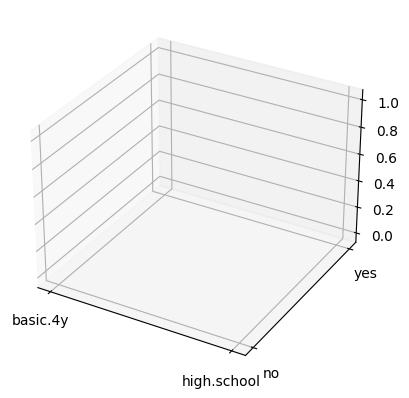

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura y un subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer las variables para el plot
x = df['education']
y = df['housing']
z = df['age']

# Plotear los puntos 3D
ax.scatter(x, y, z, c=df['cluster'], cmap='viridis', s=50)

# Etiquetas de los ejes
ax.set_xlabel('Education')
ax.set_ylabel('Housing')
ax.set_zlabel('Age')

# Título del gráfico
ax.set_title('Clustering en 3D')

# Mostrar el gráfico
plt.show()


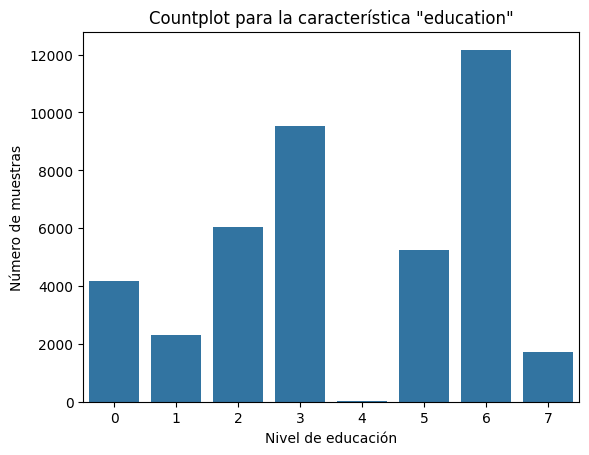

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotear countplot para la característica 'education'
sns.countplot(data=df2, x='education')
plt.title('Countplot para la característica "education"')
plt.xlabel('Nivel de educación')
plt.ylabel('Número de muestras')
plt.show()
